# 2020.05.02 머신러닝 알고리즘 스터디
# Linear Regression (선형 회귀)

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. Linear Regression의 개념

- 시험 공부시간 증가 -> 성적이 잘 나온다.
- 하루 걷는 횟수 증가 -> 몸무게 감소.
- 집 평소가 클수록 집의 매매 가격은 비싸다. <br> <br>

- 독립변수 x의 값에 의해 종속 변수 y의 값들이 변한다.
- 한 개 이상의 x와 y의 선형 관계를 모델링하는 과정을 선형 회귀라고 한다.

## 2. 종류

### (1) Simple Linear Regression Analysis (단순 선형 회귀 분석)

![대체 텍스트](https://drive.google.com/uc?id=1y9MXmCd7i2ZoxpYHZno5ddrjB5zW_6-X)

독립변수 x가 1개인 선형 회귀 분석

- x : 독립변수
- y : 종속변수
- W : 가중치(weight)
- b : 편향(bias)


### (2) Multiple Linear Regression Analysis (다중 선형 회귀 분석)

![대체 텍스트](https://drive.google.com/uc?id=1Npro2bRE02YfNwppIK5EOvfEF422RG9U)

독립변수 x가 여러 개인 선형 회귀 분석

## 3. Hypothesis (가설) 세우기

공부 시간에 따른 점수 데이터

In [10]:
import pandas as pd

hours = [2,3,4,5]
score = [25,50,42,61]

df = pd.DataFrame([hours, score]).transpose()
df.columns = ['hours', 'score']
df = df.set_index('hours')
df

,score
hours,
2,25
3,50
4,42
5,61


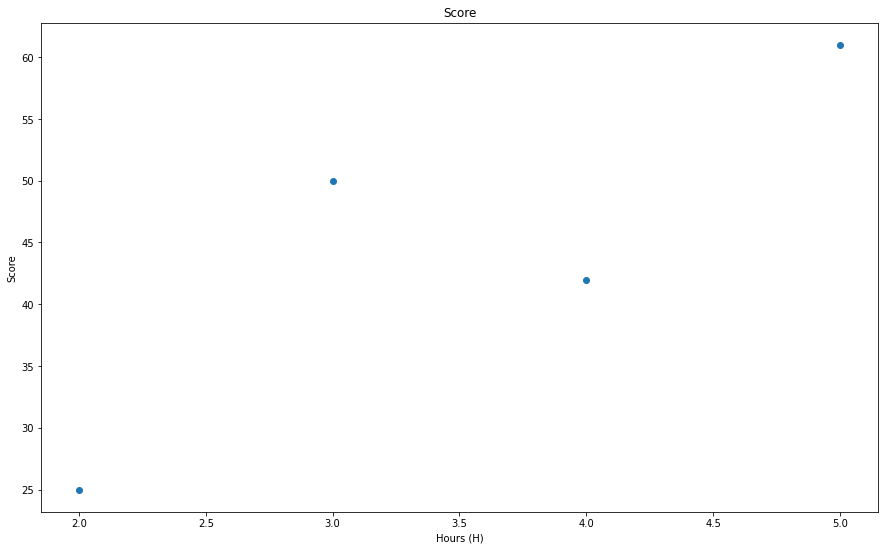

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
plt.title("Score")
plt.xlabel('Hours (H)')
plt.ylabel('Score')
plt.plot(df, 'o')

- 공부시간(x)와 점수(y)와의 관계를 유추하기 위해 수학적인 식을 세우게 되는데, 머신러닝에서는 이를 가설(Hypothesis)이라고 한다. <br> <br>
![대체 텍스트](https://drive.google.com/uc?id=1y9MXmCd7i2ZoxpYHZno5ddrjB5zW_6-X)

![대체 텍스트](https://drive.google.com/uc?id=17ybEFkqjIrCVSuz9vSl5yC6NCnPZqjDS)

- W와 b의 값에 따라서 직선이 달라진다.
- W: 직선의 기울기
- b: 절편
- 결국 선형회귀는 주어진 데이터로부터 y와 x의 관계를 잘 나타내는 직선을 그리는 일을 말한다.
- 따라서 W와 b값을 찾아내는 일이 선형 회귀에서 해야할 일이다.

## 4. Cost Function (비용 함수)

- W와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 W와 b를 찾아낸다.
- 실제값과 예측값에 대한 오차의 식: 목적 함수(Objective function) or 비용 함수(Cost function) or 손실 함수(Loss function)

### (1) Mean Squared Error(MSE, 평균 제곱 오차)

- 선형 회귀에 가장 적합한 비용 함수(Cost Function)

![대체 텍스트](https://drive.google.com/uc?id=1RhJs3GeBz4oBhLK9T1XYCLl21aTLiU3k)

- 다음과 같이, W = 13, b = 1인 직선을 그렸다.
- 서서히 W 와 b의 값을 바꾸며, 정답인 직선을 찾아야 한다.
- y와 x의 관계를 가장 잘 나타내는 직선을 그린다는 것 == 모든 점들과 위치적으로 가장 가까운 직선을 그린다.
- 양수 오차, 음수 오차가 모두 존재하므로, 오차의 제곱을 더한 것을 데이터의 갯수로 나눈다.

![대체 텍스트](https://drive.google.com/uc?id=1zt1oque0V3XMG-tJ_mYqg1kKnSKJ5emX) <br>
![대체 텍스트](https://drive.google.com/uc?id=1Guo4kgk7OwfLFwWzRA7g-D_xxQGKdSpB)

- y = 13x + 1의 MSE = 44.5
- MSE를 최소화시키는 W와 b를 찾아내는 것이 정답인 직선을 찾아내는 일.
- 비용함수는 다음과 같다. <br> <br>

![대체 텍스트](https://drive.google.com/uc?id=1svQG_FKdu68-7Xwh6DM58eriQE-0o2tv) <br>
![대체 텍스트](https://drive.google.com/uc?id=1QN_7c-CXZhtsk6S5uTrKLLG9Wi_cCoDd)

#### cf.) MSE의 큰 허점

- 왼쪽의 상황은 e = 0.2815
- 오른쪽의 상황은 e = 0.4971

![대체 텍스트](https://drive.google.com/uc?id=17BP1JftUXX1A2aD5bG8jZ188FQ2J8OBr)

- 식 (5.3)의 그래디언트가 벌점에 해당

![대체 텍스트](https://drive.google.com/uc?id=1kRjnT9vygUUh5AE_8eFG7ScjbBLDILfY)

- gradient를 계산해보면 왼쪽 상황의 gradient가 더 크다.
- 더 많은 오류를 범한 상황이 더 낮은 벌점을 받은 꼴
- 학습이 더딘 부정적인 효과

### (2) Cross Entropy (교차 엔트로피)

- 실제값이 0일 때, y값이 1에 가까워지는 오차 증가(빨간색 그래프)
- y값이 0이면, cost는 0
- 실제값이 1일 때, y값이 0에 가까워지면 오차 증가(파란색 그래프)
- y값이 1이면, cost는 0

![대체 텍스트](https://drive.google.com/uc?id=1meeEqK3vY8FZV4iJMeYFzv25As3YlUf8) <br>
![대체 텍스트](https://drive.google.com/uc?id=1av2aRrrC-8UNgN22l5XfrRpA3C5OnM90)

결과적으로 위 그래프는 다음과 같은 하나의 식으로 표현할 수 있다. <br>
![대체 텍스트](https://drive.google.com/uc?id=1oaOs-8h1ZmR5V0kSLh-hYPBnoXP78PGF) <br>

- y값이 0이면, 첫번째 항 제거
- y값이 1이면, 두번째 항 제거

결과적으로 로지스틱 회귀의 목적 함수는 아래와 같다. <br>
![대체 텍스트](https://drive.google.com/uc?id=1qb0hLxDxrixElolKfIC4GoXvOR0_08ci)

## 5. Optimizer (옵티마이저)

- 비용 함수를 최소화하는 W와 b를 찾기 위한 작업 수행.
- 이 때 사용되는 알고리즘 : Optimizer(옵티마이저) or 최적화 알고리즘

![대체 텍스트](https://drive.google.com/uc?id=1BZQ8PgadFWBj1OnYx6JJNGOeP2gF7WTP) <br>
- 출처 : https://www.slideshare.net/yongho/ss-79607172 

### (1) Gradient Descent (경사하강법)

- 가장 대표적인 Optimizer Algorithm
- 선형 회귀에 가장 적합한 Optimzer Algorithm

![대체 텍스트](https://drive.google.com/uc?id=1UpiIKk7B0aAsddUCrKQCJNf73iRgQh8t)

- 기울기(W)가 너무 크면, 오차 증가(주황색)
- 기울기(W)가 너무 작으면, 오차 증가(초록색)
- b 또한 지나치게 크거나 작으면, 오차가 증가한다.
- 결국, W 또는 b와 Cost Function(비용함수)와의 관계는 다음과 같다.

![대체 텍스트](https://drive.google.com/uc?id=17fq1m_qx7VP-_2Aa02Ip8iWKjmsZR4Ea)

- W(또는 b)의 값이 무한대로 커지거나 작아지면, cost의 값은 무한대로 커진다.
- cost가 가장 작을 떄는 볼록한 부분의 맨 아래 부분이다.
- 따라서 볼록한 부분의 맨 아래 부분의 W의 값을 찾아야 한다.
- 경사하강법은 W값을 점차 수정시켜, 맨 아래 볼록한 부분을 향해 W의 값을 수정해나간다.
- 볼록한 부분: 접선의 기울기 == 0
- 따라서, 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 W의 값을 변경해나간다.

![대체 텍스트](https://drive.google.com/uc?id=1ZFlKW1MereyzQyE1HtA_5ipOrF3IVNjr) <br>

현재 W에서 (학습률) * (접선의 기울기) 값을 빼, 새로운 W 값으로 업데이트한다.

![대체 텍스트](https://drive.google.com/uc?id=1mwgEsdm-OGjxyLmdaqDYe8luavRtjC2D)
![대체 텍스트](https://drive.google.com/uc?id=18uXeUFEUNa0tNJBfDBjs38rMRfpTvFrZ)

- 접선의 기울기: 음수 -> W 증가
- 접선의 기울기: 양수 -> W 감소
- 학습률(a): W의 값을 변경할 때 얼마나 변경할지를 결정한다.
- 학습률이 지나치게 낮은 경우: 학습 속도 느려짐.
- 학습률이 지나치게 큰 경우: W 값이 발산.

## 6. Appiled Field (응용 분야)

### 생물학, 행동학, 경제학, 기타 사회과학에서 변수들 사이의 관계를 설명하고자 할 때 사용

- 추세 분석: 데이터값이 장기적으로 어떻게 변하는지
- 역학 조사
- 재무관리
- 경제학: 비용 예측, 고정 투자 예측, 재고 관리 예측, 필요 유동 자산 예측, 노동 수요 예측, 노동 공급 예측
- 환경 과학: 환경 영향 모니터링

## 7. 예제(Keras)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

X=np.array([1,2,3,4,5,6,7,8,9]) # studying hours
y=np.array([11,22,33,44,53,66,77,87,95]) # scores

model=Sequential()
# activation: 어떤 함수를 사용할 것인지 의미
model.add(Dense(1,input_dim=1, activation='linear'))
# learning rate(학습률) == 0.01
# sgd : stochastic gradient descent (경사하강법)
sgd=optimizers.SGD(lr=0.01)

# loss function : MSE
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# implement 300 epochs to minimize MSE
model.fit(X,y, batch_size=1, epochs=300, shuffle=True)

Epoch 1/300
9/9 [==============================] - 0s 1ms/step - loss: 393.0145 - mse: 393.0145
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.7418 - mse: 2.7418
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 6.0127 - mse: 6.0127
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 3.9487 - mse: 3.9487
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 3.0110 - mse: 3.0110
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 3.5979 - mse: 3.5979
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 4.9832 - mse: 4.9832
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.4740 - mse: 2.4740
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 1.1846 - mse: 1.1846
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 3.3169 - mse: 3.3169
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 1.1

오차를 최소화하는 직선 찾기

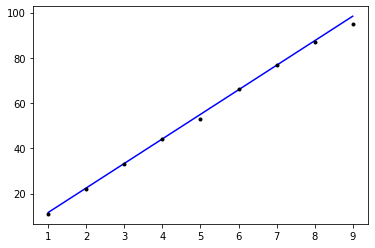

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

9시간 30분을 공부했을 때의 시험 성적 예측

In [44]:
print(model.predict([9.5]))

[[103.794495]]


## Reference

- https://wikidocs.net/21670
- https://ganghee-lee.tistory.com/m/24?category=841638